<a href="https://colab.research.google.com/github/anilkaushikwireless/email_wrapper/blob/master/my_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

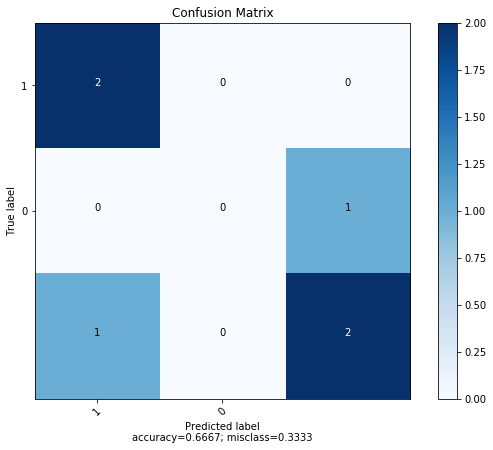

In [1]:
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from math import pi
import pandas as pd

from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.transform import cumsum


from bokeh.io import output_file, show
from bokeh.layouts import gridplot
from bokeh.plotting import figure


from bokeh.models.widgets import DataTable, TableColumn, HTMLTemplateFormatter
from bokeh.io import show

import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn.metrics import confusion_matrix

output_notebook()



def draw_vertical_bar(x_axis_data, y_axis_data, title):
  
  source = ColumnDataSource(data=dict(x_axis_data=x_axis_data, y_axis_data=y_axis_data, color=Spectral6[:4]))

  p1 = figure(x_range=x_axis_data, plot_height=250, y_range=(0, 9), title=title)
  p1.vbar(x='x_axis_data', top='y_axis_data', width=0.5, color='color', legend_field="x_axis_data", source=source)

  p1.xgrid.grid_line_color = None
  p1.legend.orientation = "vertical"
  p1.legend.location = "top_center"

  return p1


def draw_horizontal_bar(x_axis_data, y_axis_data, title):
  score = x_axis_data
  data = y_axis_data

  p = figure(
  y_range=score,
  title = title,
  x_axis_label =title,
  plot_width=800,
  plot_height=600,
  tools=""
  )

  p.hbar(
    y=score,
    right=data,
    left=0,
    height=0.4,
    color=Spectral6[:4],
    fill_alpha=0.5
  )

  return p



#Pie chart
def draw_pie_chart():
  x = { 'Column': 157, 'Non txt column': 93, 'Text column': 89 }

  data = pd.Series(x).reset_index(name='value').rename(columns={'index':'meta'})
  data['angle'] = data['value']/data['value'].sum() * 2*pi
  data['color'] = ["red", "green", "blue"]

  p3 = figure(plot_height=350, title="Meta data", toolbar_location=None,
          tools="hover", tooltips="@meta: @value")

  p3.wedge(x=0, y=1, radius=0.4,
          start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
          line_color="white", fill_color='color', legend_field='meta', source=data)
  
  return p3


def draw_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

#tablular format for all teh metrices
def draw_all_metrices():
  dict1 = {'x':[0]*6,'y':[0,1,0,1,0,1]}
  source = ColumnDataSource(data=dict1)

  template="""
  <div style="background:<%= 
      (function colorfromint(){
          if(value == 1){
              return("blue")}
          else{return("red")}
          }()) %>; 
      color: white"> 
  <%= value %></div>
  """

  formater =  HTMLTemplateFormatter(template=template)
  columns = [
      TableColumn(field="Threshold", title="Threshold"),
      TableColumn(field="Accuracy", title="Accuracy"),
      TableColumn(field="Precision", title="Precision"),
      TableColumn(field="Recall", title="Recall"),
      TableColumn(field="F1 score", title="F1 score",formatter=formater)
  ]

  data_table = DataTable(source=source, columns=columns, width=200)
  return data_table


x = list(range(11))
y0 = x
y1 = [10 - i for i in x]
y2 = [abs(i - 5) for i in x]

# create three plots

data = ['1Unseen data', 'Unseen data', '1Training data', 'Training data']
score = [5, 3, 4, 2, ]  
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
cmatrix = confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

p1 = draw_vertical_bar(data, score, "Accuracy");
p2 = draw_horizontal_bar(data,score,"F1 Score");
p3 = draw_horizontal_bar(data, score, "Precision");
p4 = draw_horizontal_bar(data, score, "Recall");


# make a grid
grid = gridplot([[p1, p2], [p3, p4]], plot_width=400, plot_height=400)
show(grid)

draw_confusion_matrix(cmatrix, 
                      normalize    = False,
                      target_names = ['1', '0'],
                      title        = "Confusion Matrix")



